Import required packages and libraries

In [1]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns
%matplotlib inline
# import warnings                   # To ignore the warnings
# warnings.filterwarnings("ignore")

train_csv_file_path = "/content/drive/MyDrive/SEM 7 - ML/Lab 1 - Feature Engineering/train.csv"
valid_csv_file_path = "/content/drive/MyDrive/SEM 7 - ML/Lab 1 - Feature Engineering/valid.csv"

# Train dataset

In [2]:
# importing train dataset

train_df = pd.read_csv(train_csv_file_path)
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


In [3]:
train_df.shape

(28520, 260)

# Validation dataset

In [4]:

valid_df = pd.read_csv(valid_csv_file_path)
valid_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.153148,-1.038098,1.419872,2.734152,1.154604,-1.086937,-0.516225,-1.370325,2.865359,-1.879877,...,-0.719046,-1.248530,0.144460,-3.240056,0.052614,0.083108,45,NaN,1,6
1,-1.377524,-1.018393,1.102352,2.849025,0.440302,-1.149039,-0.789796,-2.258196,1.264268,-2.123730,...,-1.383339,-0.787736,1.044895,-2.289637,0.199752,-0.712154,45,NaN,1,6
2,0.889574,-2.743300,-0.320194,3.047766,-0.923335,1.741686,-0.615148,0.756482,2.074775,-1.433126,...,1.178322,0.035333,0.857712,-1.928684,0.639870,-0.268576,45,NaN,1,6
3,-1.527213,-1.133121,0.385927,3.129767,0.229020,1.373105,0.919284,-0.755558,1.086973,-2.440614,...,-0.664176,0.805059,0.975368,-2.700269,1.523236,-1.259052,45,NaN,1,6
4,0.948176,-0.750248,0.008329,1.675338,1.941155,-0.783623,-0.485584,-0.261882,2.875204,-1.473030,...,-0.665200,-0.428060,-0.393100,-1.854657,2.207063,-0.342725,45,NaN,1,6


In [5]:
valid_df.shape

(750, 260)

# Exploratory Data analysis

In [6]:
train_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,-0.225478,-0.616421,-0.212878,0.336330,0.105467,-0.339634,-0.201756,0.742262,0.942325,-1.957584,...,-0.028098,0.296340,1.724439,-1.476765,0.687445,-1.563062,30.498843,27.975107,0.799299,5.997125
std,0.990632,1.005573,1.075468,1.248919,0.831132,1.073267,0.943505,1.055721,0.940459,0.876939,...,0.989497,1.173378,0.968611,1.032811,1.028328,1.243758,17.328389,5.735913,0.400532,2.375567
min,-4.023911,-5.582544,-4.679888,-4.284380,-3.010300,-5.034355,-4.355222,-3.806574,-2.922614,-5.203347,...,-3.679602,-3.905801,-3.301683,-5.490267,-3.810144,-6.056032,1.000000,22.000000,0.000000,0.000000
25%,-0.869656,-1.287018,-0.913419,-0.478661,-0.437171,-1.075753,-0.823699,0.064072,0.298269,-2.556436,...,-0.692262,-0.550897,1.121631,-2.130906,-0.008394,-2.404028,15.000000,25.000000,1.000000,6.000000
50%,-0.190790,-0.609782,-0.218800,0.295881,0.117310,-0.329571,-0.193263,0.755193,0.940786,-1.949847,...,-0.018218,0.295523,1.783432,-1.449978,0.639575,-1.650610,30.000000,27.000000,1.000000,6.000000
75%,0.457509,0.063174,0.490262,1.119242,0.657941,0.393339,0.417146,1.461846,1.579200,-1.345999,...,0.644112,1.128566,2.383575,-0.799414,1.347263,-0.805710,46.000000,30.000000,1.000000,6.000000
max,4.322171,3.876604,4.267163,5.828656,3.884939,3.890622,3.799406,4.817545,4.615069,1.147192,...,3.915582,4.458014,5.261775,2.861117,5.531152,3.338544,60.000000,61.000000,1.000000,13.000000


## Renaming the class labels

In [7]:
train_df.rename(columns={'label_1': 'speaker_ID', 'label_2': 'speaker_age', 'label_3': 'speaker_gender', 'label_4': 'speaker_accent'}, inplace=True)


In [8]:
valid_df.rename(columns={'label_1': 'speaker_ID', 'label_2': 'speaker_age', 'label_3': 'speaker_gender', 'label_4': 'speaker_accent'}, inplace=True)


In [9]:
valid_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,speaker_ID,speaker_age,speaker_gender,speaker_accent
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,-0.215982,-0.623504,-0.291264,0.377151,0.178972,-0.252002,-0.228841,0.771239,0.922442,-1.959988,...,-0.051848,0.342457,1.691002,-1.485593,0.691309,-1.567317,30.085333,28.330163,0.810667,6.117333
std,0.956326,1.035303,1.128986,1.244136,0.843049,1.069149,0.955363,1.074252,0.947518,0.868173,...,0.987202,1.141813,0.938246,1.051536,1.004137,1.268333,17.489060,6.518500,0.392035,2.227895
min,-3.600761,-5.998218,-3.933543,-3.788818,-2.352740,-4.067048,-3.307670,-3.230605,-2.501911,-4.732800,...,-2.942192,-2.858132,-1.695706,-4.781263,-2.499728,-5.805717,1.000000,22.000000,0.000000,0.000000
25%,-0.834711,-1.307291,-0.998405,-0.422144,-0.424725,-0.992993,-0.916115,0.110733,0.323182,-2.508483,...,-0.716455,-0.491588,1.049466,-2.149493,0.035928,-2.459352,15.000000,25.000000,1.000000,6.000000
50%,-0.205673,-0.607260,-0.307802,0.326517,0.190352,-0.196757,-0.212617,0.816087,0.910706,-1.918432,...,-0.031057,0.333020,1.772243,-1.503996,0.620206,-1.634017,29.000000,27.000000,1.000000,6.000000
75%,0.417797,0.030387,0.412266,1.156195,0.757207,0.476947,0.429078,1.482462,1.535642,-1.396017,...,0.617642,1.135099,2.372264,-0.847414,1.324276,-0.752141,45.000000,30.000000,1.000000,6.000000
max,2.302163,2.441009,3.116088,4.058463,2.861698,2.790602,3.414155,4.249192,3.708912,0.418425,...,3.356440,3.532709,3.927659,2.039558,4.018772,2.496667,60.000000,61.000000,1.000000,13.000000


## Identification of class imbalance issue

In [10]:
train_df.speaker_accent.value_counts()

# I noticed that “speaker_accent” has a class imbalance issue. Fig 3 below showcases that (the value ‘6’ has very high frequency compared to other values).
# To address this issue, I used class_weight='balanced' parameter when training the models.

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: speaker_accent, dtype: int64

In [11]:
train_df.speaker_ID.value_counts()

12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: speaker_ID, dtype: int64

In [12]:
train_df.speaker_age.value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: speaker_age, dtype: int64

In [13]:
train_df.speaker_gender.value_counts()

1    22796
0     5724
Name: speaker_gender, dtype: int64

## Checking for null values

In [14]:

# Check for null/NaN values in all columns
print(train_df.isna().any())

feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
                  ...  
feature_256       False
speaker_ID        False
speaker_age        True
speaker_gender    False
speaker_accent    False
Length: 260, dtype: bool


<Axes: >

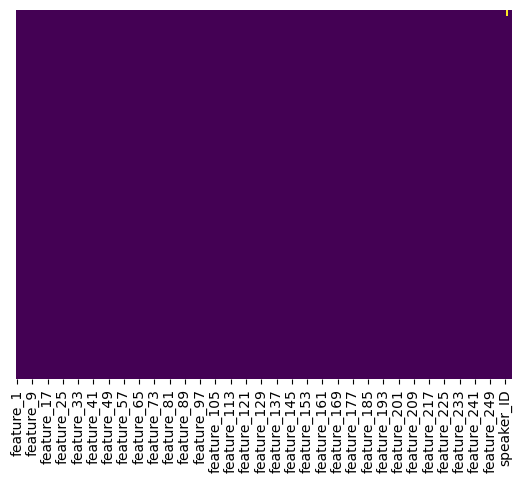

In [15]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# note that the missing values represented as yellow bar (top right hand corner in below heatmap)

In [16]:
# Check for null/NaN values in all columns
print(valid_df.isna().any())

feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
                  ...  
feature_256       False
speaker_ID        False
speaker_age        True
speaker_gender    False
speaker_accent    False
Length: 260, dtype: bool


<Axes: >

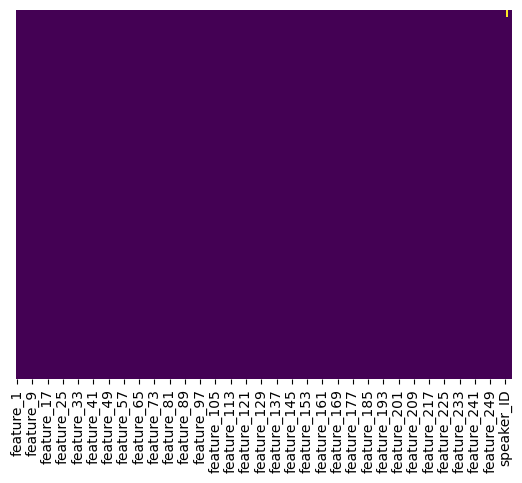

In [17]:
sns.heatmap(valid_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# note that the missing values represented as yellow bar (top right hand corner in below heatmap)

## Replace missing values with the mean of the column

In [18]:
# from the above heatmaps we can see some missing values in speaker_age column

# Replace missing values with the mean of the column
train_df.speaker_age.fillna(round(train_df.speaker_age.mean()), inplace=True)

<Axes: >

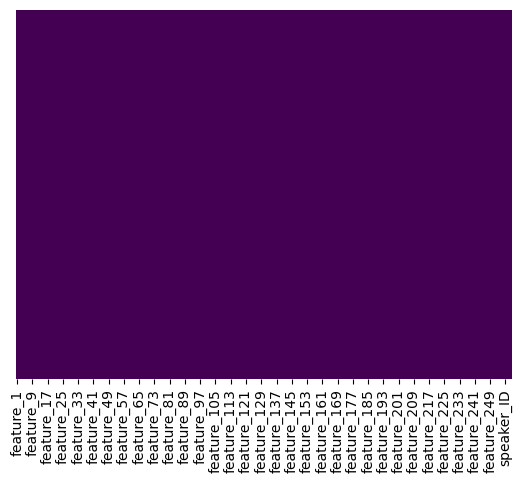

In [19]:
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Note that now the yellow bar dissapears because we assigned the mean value for missing speaker_age values

In [20]:
valid_df.speaker_age.fillna(round(valid_df.speaker_age.mean()), inplace=True)

<Axes: >

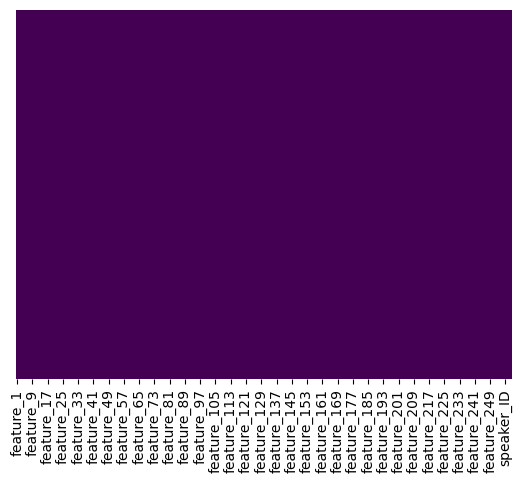

In [21]:
sns.heatmap(valid_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Note that now the yellow bar dissapears because we assigned the mean value for missing speaker_age values

# Running Models for the raw features

In [22]:
# Get features (X) and target (y) from the testing dataset
valid_X = valid_df.drop(columns=['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'])
valid_speaker_IDs = valid_df['speaker_ID']
valid_speaker_ages = valid_df['speaker_age']
valid_speaker_genders = valid_df['speaker_gender']
valid_speaker_accents = valid_df['speaker_accent']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Get features (X) and target (y) from the training dataset
train_X = train_df.drop(columns=['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'])
train_speaker_IDs = train_df['speaker_ID']
train_speaker_ages = train_df['speaker_age']
train_speaker_genders = train_df['speaker_gender']
train_speaker_accents = train_df['speaker_accent']

In [25]:
import warnings
# function to run all models and print the best accuracy along with the model name
# it will train all the models based on train_X (training dataset) and give accuracies based on test_X (testing dataset)
def run_models_and_check_with_test_dataset(train_features, train_class_labels, test_features, test_class_labels):

  accuracies = []
  warnings.filterwarnings("ignore")
  svm_model = SVC(class_weight='balanced')
  svm_model.fit(train_features, train_class_labels)

  nb_model = GaussianNB()
  nb_model.fit(train_features, train_class_labels)

  logreg_model = LogisticRegression(class_weight='balanced')
  logreg_model.fit(train_features, train_class_labels)

  rf_model = RandomForestClassifier(class_weight='balanced')
  rf_model.fit(train_features, train_class_labels)

  # Prediction
  svm_predictions = svm_model.predict(test_features)
  nb_predictions = nb_model.predict(test_features)
  logreg_predictions = logreg_model.predict(test_features)
  rf_predictions = rf_model.predict(test_features)

  name_of_max_model = "SVM"

  # Evaluate the models
  # print("Support Vector Machine:")
  accuracy = accuracy_score(test_class_labels, svm_predictions)
  accuracies.append(accuracy)
  # print("Accuracy:", accuracy)

  # print("Naive Bayes:")
  accuracy = accuracy_score(test_class_labels, nb_predictions)
  accuracies.append(accuracy)
  if accuracy > max(accuracies):
    name_of_max_model = "NB"
  # print("Accuracy:", accuracy)

  # print("Logistic Regression:")
  accuracy = accuracy_score(test_class_labels, logreg_predictions)
  accuracies.append(accuracy)
  # print("Accuracy:", accuracy)
  if accuracy > max(accuracies):
    name_of_max_model = "Logistic Regression"

  # print("Random Forest:")
  accuracy = accuracy_score(test_class_labels, rf_predictions)
  accuracies.append(accuracy)
  # print("Accuracy:", accuracy)
  if accuracy > max(accuracies):
    name_of_max_model = "Random Forest"


  print("Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is:", max(accuracies), "(",name_of_max_model,")")


def run_models_and_check_with_train_test_split_on_train_dataset(train_features, train_class_labels):
  warnings.filterwarnings("ignore")
  X_train, X_test, y_train, y_test = train_test_split(train_features, train_class_labels, test_size=0.2, random_state=42)
  accuracies = []

  svm_model = SVC(class_weight='balanced')
  svm_model.fit(X_train, y_train)

  nb_model = GaussianNB()
  nb_model.fit(X_train, y_train)

  logreg_model = LogisticRegression(class_weight='balanced')
  logreg_model.fit(X_train, y_train)

  rf_model = RandomForestClassifier(class_weight='balanced')
  rf_model.fit(X_train, y_train)

  # Prediction
  svm_predictions = svm_model.predict(X_test)
  nb_predictions = nb_model.predict(X_test)
  logreg_predictions = logreg_model.predict(X_test)
  rf_predictions = rf_model.predict(X_test)

  name_of_max_model = "SVM"

  # Evaluate the models
  # print("Support Vector Machine:")
  accuracy = accuracy_score(y_test, svm_predictions)
  accuracies.append(accuracy)
  # print("Accuracy:", accuracy)

  print("Naive Bayes:")
  accuracy = accuracy_score(y_test, nb_predictions)
  accuracies.append(accuracy)
  if accuracy > max(accuracies):
    name_of_max_model = "NB"
  # print("Accuracy:", accuracy)

  # print("Logistic Regression:")
  accuracy = accuracy_score(y_test, logreg_predictions)
  accuracies.append(accuracy)
  if accuracy > max(accuracies):
    name_of_max_model = "Logistic Regression"
  # print("Accuracy:", accuracy)

  # print("Random Forest:")
  accuracy = accuracy_score(y_test, rf_predictions)
  accuracies.append(accuracy)
  if accuracy > max(accuracies):
    name_of_max_model = "Random Forest"
  # print("Accuracy:", accuracy)

  print("Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is:", max(accuracies), "(",name_of_max_model,")")

## Results

### Accuracies on validation dataset

In [ ]:
run_models_and_check_with_test_dataset(train_X, train_speaker_IDs, valid_X, valid_speaker_IDs)
run_models_and_check_with_test_dataset(train_X, train_speaker_ages, valid_X, valid_speaker_ages)
run_models_and_check_with_test_dataset(train_X, train_speaker_genders, valid_X, valid_speaker_genders)
run_models_and_check_with_test_dataset(train_X, train_speaker_accents, valid_X, valid_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.992 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9786666666666667 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9906666666666667 ( SVM )


### Accuracies on train dataset (with a 80:20 train:test split)

In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(train_X, train_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(train_X, train_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(train_X, train_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(train_X, train_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9921107994389902 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9738779803646563 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9992987377279102 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9840462833099579 ( SVM )


# Featuring Engineering

## Standardization the features

In [26]:
print(train_X.shape)

(28520, 256)


In [27]:
from sklearn.preprocessing import StandardScaler

train_X_std = pd.DataFrame()
ss = StandardScaler()

ss.fit(train_X)
train_X_std = ss.transform(train_X)
train_X_std = pd.DataFrame(train_X_std)

train_X_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,...,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04,2.852000e+04
mean,3.986215e-18,1.993107e-17,1.993107e-17,1.195864e-17,-1.594486e-17,-1.195864e-17,1.993107e-17,1.195864e-17,-6.377943e-17,2.391729e-17,...,-3.986215e-18,-4.982768e-17,9.566915e-17,6.975875e-17,2.391729e-17,-1.195864e-17,-7.374497e-17,-9.566915e-17,-6.377943e-17,-1.993107e-17
std,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,...,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00,1.000018e+00
min,-3.834422e+00,-4.938687e+00,-4.153624e+00,-3.699833e+00,-3.748887e+00,-4.374312e+00,-4.402243e+00,-4.308826e+00,-4.109704e+00,-3.701305e+00,...,-4.054992e+00,-3.973555e+00,-4.256645e+00,-4.150868e+00,-3.690328e+00,-3.581297e+00,-5.189090e+00,-3.886065e+00,-4.373767e+00,-3.612478e+00
25%,-6.502805e-01,-6.668919e-01,-6.513943e-01,-6.525690e-01,-6.529014e-01,-6.858795e-01,-6.591950e-01,-6.424065e-01,-6.848443e-01,-6.829011e-01,...,-6.979189e-01,-6.740037e-01,-6.362087e-01,-6.803694e-01,-6.712256e-01,-7.220621e-01,-6.223533e-01,-6.333705e-01,-6.766814e-01,-6.761615e-01
50%,3.501709e-02,6.602356e-03,-5.506804e-03,-3.238791e-02,1.424942e-02,9.376448e-03,9.001863e-03,1.224833e-02,-1.636495e-03,8.823296e-03,...,-4.201522e-02,2.659437e-02,4.476444e-02,5.029245e-04,9.984643e-03,-6.966865e-04,6.090572e-02,2.593739e-02,-4.655127e-02,-7.039145e-02
75%,6.894582e-01,6.758403e-01,6.538103e-01,6.268827e-01,6.647358e-01,6.829483e-01,6.559725e-01,6.816160e-01,6.772076e-01,6.974210e-01,...,6.635117e-01,6.890961e-01,6.712363e-01,6.929655e-01,6.793566e-01,7.092681e-01,6.805080e-01,6.558442e-01,6.416535e-01,6.089327e-01
max,4.590737e+00,4.468203e+00,4.165740e+00,4.397741e+00,4.547456e+00,3.941547e+00,4.240817e+00,3.860258e+00,3.905338e+00,3.540530e+00,...,3.846998e+00,4.017919e+00,3.558372e+00,3.890257e+00,3.985610e+00,3.546808e+00,3.652031e+00,4.200146e+00,4.710357e+00,3.941033e+00


In [28]:
from sklearn.preprocessing import StandardScaler

valid_X_std = pd.DataFrame()
valid_X_std = ss.transform(valid_X)
valid_X_std = pd.DataFrame(valid_X_std)

valid_X_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,0.009587,-0.007044,-0.072888,0.032685,0.088441,0.081651,-0.028707,0.027448,-0.021143,-0.002742,...,-0.015877,0.014362,0.007565,0.048013,-0.024003,0.039303,-0.034521,-0.008547,0.003758,-0.003421
std,0.965387,1.029584,1.049781,0.996187,1.014356,0.996181,1.012586,1.017571,1.007524,0.990021,...,1.060056,0.997843,1.007724,1.006598,0.997698,0.973116,0.968668,1.018148,0.976492,1.019777
min,-3.407263,-5.352065,-3.459639,-3.303033,-2.957712,-3.473022,-3.291946,-3.763247,-3.662359,-3.164717,...,-3.749178,-3.179273,-4.506079,-3.175395,-2.945078,-2.688415,-3.531041,-3.199573,-3.099428,-3.411218
25%,-0.615005,-0.687053,-0.730418,-0.607315,-0.637926,-0.608768,-0.757146,-0.598208,-0.658354,-0.628218,...,-0.686880,-0.664540,-0.588572,-0.623626,-0.695676,-0.671516,-0.696859,-0.651367,-0.633580,-0.720643
50%,0.019993,0.009110,-0.088265,-0.007857,0.102133,0.133126,-0.011511,0.069929,-0.033622,0.044647,...,-0.096596,-0.004287,0.008329,0.008022,-0.002990,0.031260,0.049354,-0.026366,-0.065388,-0.057050
75%,0.649370,0.643234,0.581286,0.656471,0.784173,0.760850,0.668619,0.701145,0.630891,0.640383,...,0.614497,0.676634,0.703549,0.718162,0.652605,0.714837,0.668830,0.609368,0.619299,0.652003
max,2.551590,3.040539,3.095419,2.980335,3.316294,2.916601,3.832490,3.321893,2.941794,2.709481,...,3.435093,3.260914,2.465746,3.240581,3.420522,2.758212,2.274658,3.404673,3.239614,3.264140


In [29]:
train_X_std.shape

(28520, 256)

In [30]:
valid_X_std.shape

(750, 256)

In [ ]:
run_models_and_check_with_test_dataset(train_X_std, train_speaker_IDs, valid_X_std, valid_speaker_IDs)
run_models_and_check_with_test_dataset(train_X_std, train_speaker_ages, valid_X_std, valid_speaker_ages)
run_models_and_check_with_test_dataset(train_X_std, train_speaker_genders, valid_X_std, valid_speaker_genders)
run_models_and_check_with_test_dataset(train_X_std, train_speaker_accents, valid_X_std, valid_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9946666666666667 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9853333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9933333333333333 ( SVM )


In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(train_X_std, train_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(train_X_std, train_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(train_X_std, train_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(train_X_std, train_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9938639551192145 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9850981767180925 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9996493688639552 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9898316970546984 ( SVM )


## Check for Constant and quasi-constant features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
def constant_feature_detect(data,threshold=0.98):
    """ detect features that show the same value for the
    majority/all of the observations (constant/quasi-constant features)

    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable as constant

    Returns
    -------
    list of variables names
    """

    data_copy = data.copy(deep=True)
    quasi_constant_feature = []
    for feature in data_copy.columns:
        predominant = (data_copy[feature].value_counts() / float(
                      len(data_copy))).sort_values(ascending=False).values[0]
        if predominant >= threshold:
            quasi_constant_feature.append(feature)
    print(len(quasi_constant_feature),' variables are found to be almost constant')
    return quasi_constant_feature



In [ ]:
quasi_constant_feature = constant_feature_detect(data=train_X_std,threshold=0.8)
quasi_constant_feature

# No quasi constant features found (check below output)

0  variables are found to be almost constant


[]

In [ ]:
# Instantiate VarianceThreshold with a threshold value (e.g., 0.01)
threshold_value = 0.01
selector = VarianceThreshold(threshold=threshold_value)

# Fit and transform the DataFrame to identify and remove low-variance features
df_transformed = selector.fit_transform(train_X_std)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = train_X_std.columns[selected_indices]

# Create a new DataFrame with selected features
df_selected = train_X_std[selected_features]

print("Original DataFrame:")
print(train_X_std.shape)
print("\nDataFrame after removing constant/quasi-constant features:")
print(df_selected.shape)

# No feature reduction as per the below output (shows all the 256 columns)

Original DataFrame:
(28520, 256)

DataFrame after removing constant/quasi-constant features:
(28520, 256)


## Check for highly-correlated features

In [ ]:
def corr_feature_detect(data,threshold=0.8):
    """ detect highly-correlated features of a Dataframe
    Parameters
    ----------
    data : pd.Dataframe
    threshold : threshold to identify the variable correlated

    Returns
    -------
    pairs of correlated variables
    """

    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() # absolute value of corr coef
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] # remove the digonal
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']

    grouped_feature_ls = []
    correlated_groups = []

    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:

            # find all features correlated to a single feature
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]

            # append the block of features to the list
            correlated_groups.append(correlated_block)
    return correlated_groups

In [ ]:
# Correlation method
# remove features that are highly correlated with each other
corr = corr_feature_detect(data=train_X_std,threshold=0.8)
print(corr)

# No feature reduction can be done using this method as well (check below output)

[]


## Reduce number of Features based on Mutual information measure

In [ ]:
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [ ]:
def mutual_info(X,y,select_k=10):
    if select_k >= 1:
        sel_ = SelectKBest(mutual_info_classif, k=select_k).fit(X, y)
        selected_indices = sel_.get_support(indices=True)
    elif 0 < select_k < 1:
        sel_ = SelectPercentile(mutual_info_classif, percentile=select_k*100).fit(X, y)
        selected_indices = sel_.get_support(indices=True)
    else:
        raise ValueError("select_k must be a positive number")

    X_selected = X.iloc[:, selected_indices]
    return X_selected, selected_indices

In [ ]:
# Mutual Information Filter
# Mutual information measures how much information the presence/absence of a feature contributes to making the
# correct prediction on Y.

mi_top_95_percent_train_for_ids, selected_indices_for_ids = mutual_info(X=train_X_std, y=train_speaker_IDs, select_k=0.95)
mi_top_95_percent_train_for_ages, selected_indices_for_ages = mutual_info(X=train_X_std, y=train_speaker_ages, select_k=0.95)
mi_top_95_percent_train_for_genders, selected_indices_for_genders = mutual_info(X=train_X_std, y=train_speaker_genders, select_k=0.95)
mi_top_95_percent_train_for_accents, selected_indices_for_accents = mutual_info(X=train_X_std, y=train_speaker_accents, select_k=0.95)

# Slice the original Train DataFrame using the selected indices
df_top_95_percent_train_for_ids = train_X_std.iloc[:, selected_indices_for_ids]
df_top_95_percent_train_for_ages = train_X_std.iloc[:, selected_indices_for_ages]
df_top_95_percent_train_for_genders = train_X_std.iloc[:, selected_indices_for_genders]
df_top_95_percent_train_for_accents = train_X_std.iloc[:, selected_indices_for_accents]

# Print the resulting DataFrame
print(df_top_95_percent_train_for_ids.shape)
print(df_top_95_percent_train_for_ages.shape)
print(df_top_95_percent_train_for_genders.shape)
print(df_top_95_percent_train_for_accents.shape)

# This technique has reduced features as per the below output

(28520, 243)
(28520, 243)
(28520, 243)
(28520, 243)


In [ ]:
# Slice the original validation DataFrame using the selected indices
df_top_95_percent_valid_for_ids = valid_X_std.iloc[:, selected_indices_for_ids]
df_top_95_percent_valid_for_ages = valid_X_std.iloc[:, selected_indices_for_ages]
df_top_95_percent_valid_for_genders = valid_X_std.iloc[:, selected_indices_for_genders]
df_top_95_percent_valid_for_accents = valid_X_std.iloc[:, selected_indices_for_accents]

# Print the resulting DataFrame
print(df_top_95_percent_valid_for_ids.shape)
print(df_top_95_percent_valid_for_ages.shape)
print(df_top_95_percent_valid_for_genders.shape)
print(df_top_95_percent_valid_for_accents.shape)


(750, 243)
(750, 243)
(750, 243)
(750, 243)


In [ ]:
run_models_and_check_with_test_dataset(df_top_95_percent_train_for_ids, train_speaker_IDs, df_top_95_percent_valid_for_ids, valid_speaker_IDs)
run_models_and_check_with_test_dataset(df_top_95_percent_train_for_ages, train_speaker_ages, df_top_95_percent_valid_for_ages, valid_speaker_ages)
run_models_and_check_with_test_dataset(df_top_95_percent_train_for_genders, train_speaker_genders, df_top_95_percent_valid_for_genders, valid_speaker_genders)
run_models_and_check_with_test_dataset(df_top_95_percent_train_for_accents, train_speaker_accents, df_top_95_percent_valid_for_accents, valid_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9933333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9853333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9946666666666667 ( SVM )


In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(df_top_95_percent_train_for_ids, train_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(df_top_95_percent_train_for_ages, train_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(df_top_95_percent_train_for_genders, train_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(df_top_95_percent_train_for_accents, train_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9938639551192145 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9850981767180925 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9996493688639552 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.989656381486676 ( SVM )


## Univariate MSE
builds one decision tree per feature, to predict the target, then make predictions and ranks the features according to the machine learning metric (mse)

In [ ]:
(train_X_std.dtypes == float).count()

256

In [ ]:
def univariate_mse(X_train,y_train,X_test,y_test,threshold):
  """
  First, it builds one decision tree per feature, to predict the target
  Second, it makes predictions using the decision tree and the mentioned feature
  Third, it ranks the features according to the machine learning metric (roc-auc or mse)
  It selects the highest ranked features

  """
  mse_values = []
  for feature in X_train.columns:
      clf = DecisionTreeRegressor()
      clf.fit(X_train[feature].to_frame(), y_train)
      y_scored = clf.predict(X_test[feature].to_frame())
      mse_values.append(mean_squared_error(y_test, y_scored))
  mse_values = pd.Series(mse_values)
  mse_values.index = X_train.columns
  n = len(mse_values)
  if threshold > 1:
    print("The threshold value should be less than 1")
    return
  else:
    n_selected = int(threshold * n)
    print("Number of original features: " + str(n))
    print("Number of selected features: " + str(n_selected) + " (Based on the threshold: " + str(threshold) + ")")
    keep_col = mse_values[: n_selected]
    return keep_col

X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(train_X_std, train_speaker_IDs, test_size=0.2, random_state=42)

uni_mse = univariate_mse(X_train=X_train_temp, y_train=y_train_temp,
                                 X_test=X_test_temp, y_test=y_test_temp, threshold=0.8)


Number of original features: 256
Number of selected features: 204 (Based on the threshold: 0.8)


In [ ]:
selected_feature_names = uni_mse.index.tolist()
selected_features_train_X = train_X_std[selected_feature_names]
selected_features_valid_X = valid_X_std[selected_feature_names]

print(selected_features_train_X.shape)
print(selected_features_valid_X.shape)

(28520, 204)
(750, 204)


In [ ]:
run_models_and_check_with_test_dataset(selected_features_train_X, train_speaker_IDs, selected_features_valid_X, valid_speaker_IDs)

#Though the features got reduced to 204 (from 256), the accuracy dropped to 0.9906666666666667 from 0.992

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9946666666666667 ( SVM )


In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(selected_features_train_X, train_speaker_IDs)

#Though the features got reduced to 204 (from 256), the accuracy dropped to 0.9919354838709677 from 0.9921107994389902

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9935133239831697 ( SVM )


## Model-Based Feature Selection

In [31]:
import pandas as pd
import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectFromModel

In [33]:
# Create a separate SelectFromModel instance for each target variable
select_for_IDs = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))
select_for_ages = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))
select_for_genders = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))
select_for_accents = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))

# ===========================
select_for_IDs = select_for_IDs.fit(train_X_std, train_speaker_IDs)
select_for_ages = select_for_ages.fit(train_X_std, train_speaker_ages)
select_for_genders = select_for_genders.fit(train_X_std, train_speaker_genders)
select_for_accents = select_for_accents.fit(train_X_std, train_speaker_accents)

selected_X_for_IDs = select_for_IDs.transform(train_X_std)
selected_X_for_ages = select_for_ages.transform(train_X_std)
selected_X_for_genders = select_for_genders.transform(train_X_std)
selected_X_for_accents = select_for_accents.transform(train_X_std)
# ===========================

# Fit each SelectFromModel instance and transform the data
# selected_X_for_IDs = select_for_IDs.fit_transform(train_X_std, train_speaker_IDs)
# selected_X_for_ages = select_for_ages.fit_transform(train_X_std, train_speaker_ages)
# selected_X_for_genders = select_for_genders.fit_transform(train_X_std, train_speaker_genders)
# selected_X_for_accents = select_for_accents.fit_transform(train_X_std, train_speaker_accents)

# Get the indices of selected features for each target variable
# selected_indices_for_IDs = select_for_IDs.get_support(indices=True)
# selected_indices_for_ages = select_for_ages.get_support(indices=True)
# selected_indices_for_genders = select_for_genders.get_support(indices=True)
# selected_indices_for_accents = select_for_accents.get_support(indices=True)

# # Get the names of the selected columns
# selected_column_names_for_IDs = train_X_std.columns[selected_indices_for_IDs]
# selected_column_names_for_ages = train_X_std.columns[selected_indices_for_ages]
# selected_column_names_for_genders = train_X_std.columns[selected_indices_for_genders]
# selected_column_names_for_accents = train_X_std.columns[selected_indices_for_accents]

# # Extract the selected columns from the validation set
# reduced_validation_for_IDs = valid_X_std[selected_column_names_for_IDs]
# reduced_validation_for_ages = valid_X_std[selected_column_names_for_ages]
# reduced_validation_for_genders = valid_X_std[selected_column_names_for_genders]
# reduced_validation_for_accents = valid_X_std[selected_column_names_for_accents]


In [34]:
# ============================
reduced_validation_for_IDs = select_for_IDs.transform(valid_X_std)
reduced_validation_for_ages = select_for_ages.transform(valid_X_std)
reduced_validation_for_genders = select_for_genders.transform(valid_X_std)
reduced_validation_for_accents = select_for_accents.transform(valid_X_std)
# ==============================

In [35]:
# Print the resulting DataFrame (reduced version of training dataFrame)
print("Reduced version of training dataFrame:")
print(selected_X_for_IDs.shape)
print(selected_X_for_ages.shape)
print(selected_X_for_genders.shape)
print(selected_X_for_accents.shape)

# Print the resulting DataFrame (reduced version of validation dataFrame)
print("\nReduced version of validation dataFrame:")
print(reduced_validation_for_IDs.shape)
print(reduced_validation_for_ages.shape)
print(reduced_validation_for_genders.shape)
print(reduced_validation_for_accents.shape)

Reduced version of training dataFrame:
(28520, 255)
(28520, 249)
(28520, 40)
(28520, 244)

Reduced version of validation dataFrame:
(750, 255)
(750, 249)
(750, 40)
(750, 244)


In [ ]:
run_models_and_check_with_test_dataset(selected_X_for_IDs, train_speaker_IDs, reduced_validation_for_IDs, valid_speaker_IDs)
run_models_and_check_with_test_dataset(selected_X_for_ages, train_speaker_ages, reduced_validation_for_ages, valid_speaker_ages)
run_models_and_check_with_test_dataset(selected_X_for_genders, train_speaker_genders, reduced_validation_for_genders, valid_speaker_genders)
run_models_and_check_with_test_dataset(selected_X_for_accents, train_speaker_accents, reduced_validation_for_accents, valid_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9946666666666667 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9853333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9933333333333333 ( SVM )


In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(selected_X_for_IDs, train_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(selected_X_for_ages, train_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(selected_X_for_genders, train_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(selected_X_for_accents, train_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9936886395511921 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9856241234221599 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9989481065918654 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9901823281907434 ( SVM )


## Random Forest Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier #RandomForestRegressor
#from sklearn.feature_selection import SelectFromModel

def rf_importance(X_train,y_train,max_depth=10,class_weight=None,top_n=15,n_estimators=50,random_state=0):

    model = RandomForestClassifier(n_estimators=n_estimators,max_depth=max_depth,
                                    random_state=random_state,class_weight=class_weight,
                                    n_jobs=-1)
    model.fit(X_train, y_train)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feat_labels = X_train.columns
    std = np.std([tree.feature_importances_ for tree in model.estimators_],
                 axis=0) #  inter-trees variability.
    print("Feature ranking:")
    for f in range(X_train.shape[1]):
        print("%d. feature no:%d feature name:%s (%f)" % (f + 1, indices[f], feat_labels[indices[f]], importances[indices[f]]))

    # plotting
    indices = indices[0:top_n]
    plt.figure()
    plt.title("Feature importances top %d" % top_n)
    plt.bar(range(top_n), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(top_n), indices)
    plt.xlim([-1,top_n])
    plt.show()

    return model

Feature ranking:
1. feature no:43 feature name:43 (0.020993)
2. feature no:232 feature name:232 (0.017179)
3. feature no:23 feature name:23 (0.012423)
4. feature no:221 feature name:221 (0.011776)
5. feature no:34 feature name:34 (0.011475)
6. feature no:188 feature name:188 (0.010383)
7. feature no:231 feature name:231 (0.010354)
8. feature no:14 feature name:14 (0.010022)
9. feature no:62 feature name:62 (0.009978)
10. feature no:237 feature name:237 (0.009951)
11. feature no:137 feature name:137 (0.009104)
12. feature no:228 feature name:228 (0.008892)
13. feature no:218 feature name:218 (0.008878)
14. feature no:250 feature name:250 (0.008822)
15. feature no:112 feature name:112 (0.008560)
16. feature no:186 feature name:186 (0.008210)
17. feature no:35 feature name:35 (0.008089)
18. feature no:7 feature name:7 (0.008072)
19. feature no:25 feature name:25 (0.007900)
20. feature no:50 feature name:50 (0.007468)
21. feature no:41 feature name:41 (0.007429)
22. feature no:45 feature n

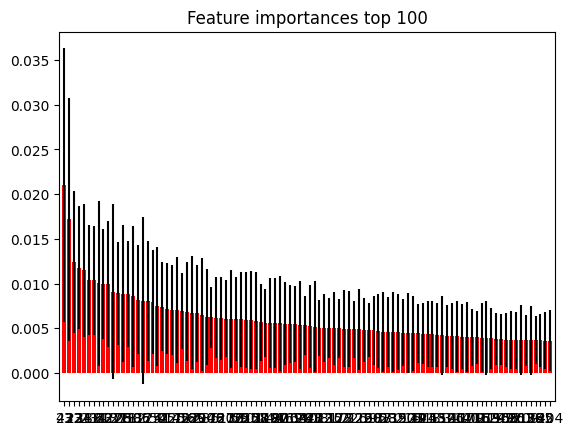

Feature ranking:
1. feature no:43 feature name:43 (0.015842)
2. feature no:232 feature name:232 (0.014731)
3. feature no:23 feature name:23 (0.014472)
4. feature no:221 feature name:221 (0.012161)
5. feature no:14 feature name:14 (0.011663)
6. feature no:142 feature name:142 (0.011204)
7. feature no:188 feature name:188 (0.010761)
8. feature no:27 feature name:27 (0.009901)
9. feature no:228 feature name:228 (0.009101)
10. feature no:59 feature name:59 (0.008673)
11. feature no:34 feature name:34 (0.008448)
12. feature no:173 feature name:173 (0.008356)
13. feature no:141 feature name:141 (0.008267)
14. feature no:62 feature name:62 (0.008140)
15. feature no:112 feature name:112 (0.007919)
16. feature no:57 feature name:57 (0.007609)
17. feature no:135 feature name:135 (0.007600)
18. feature no:137 feature name:137 (0.007309)
19. feature no:35 feature name:35 (0.007163)
20. feature no:45 feature name:45 (0.007134)
21. feature no:218 feature name:218 (0.006941)
22. feature no:50 feature

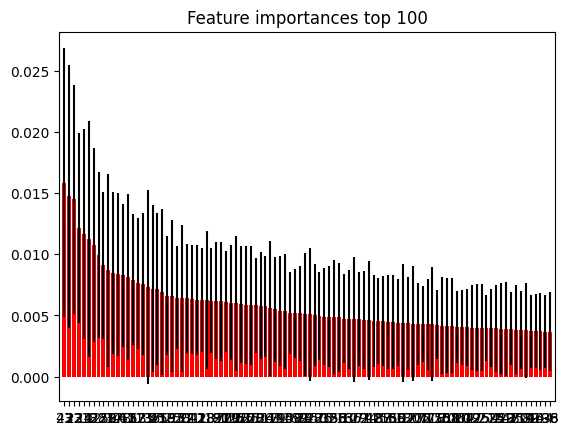

Feature ranking:
1. feature no:232 feature name:232 (0.162243)
2. feature no:43 feature name:43 (0.115372)
3. feature no:35 feature name:35 (0.084131)
4. feature no:218 feature name:218 (0.046433)
5. feature no:112 feature name:112 (0.040607)
6. feature no:59 feature name:59 (0.037439)
7. feature no:200 feature name:200 (0.033878)
8. feature no:142 feature name:142 (0.032734)
9. feature no:116 feature name:116 (0.031703)
10. feature no:177 feature name:177 (0.030371)
11. feature no:222 feature name:222 (0.022637)
12. feature no:208 feature name:208 (0.020687)
13. feature no:34 feature name:34 (0.017425)
14. feature no:45 feature name:45 (0.017297)
15. feature no:101 feature name:101 (0.015860)
16. feature no:165 feature name:165 (0.013843)
17. feature no:233 feature name:233 (0.013228)
18. feature no:206 feature name:206 (0.008106)
19. feature no:255 feature name:255 (0.007919)
20. feature no:15 feature name:15 (0.007820)
21. feature no:228 feature name:228 (0.007751)
22. feature no:22

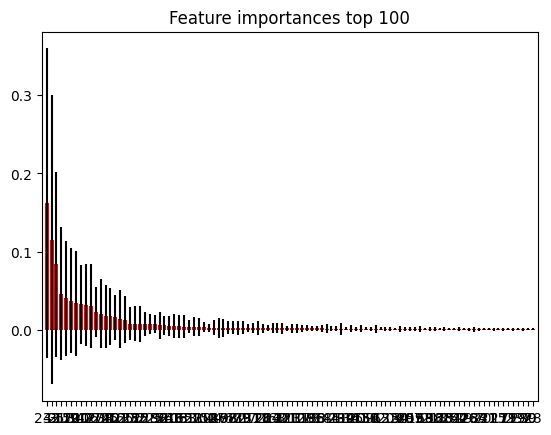

Feature ranking:
1. feature no:98 feature name:98 (0.025759)
2. feature no:82 feature name:82 (0.013025)
3. feature no:77 feature name:77 (0.011545)
4. feature no:226 feature name:226 (0.011193)
5. feature no:200 feature name:200 (0.011149)
6. feature no:181 feature name:181 (0.009866)
7. feature no:20 feature name:20 (0.009619)
8. feature no:116 feature name:116 (0.009467)
9. feature no:159 feature name:159 (0.009444)
10. feature no:35 feature name:35 (0.009238)
11. feature no:32 feature name:32 (0.008741)
12. feature no:118 feature name:118 (0.008165)
13. feature no:212 feature name:212 (0.007895)
14. feature no:142 feature name:142 (0.007801)
15. feature no:232 feature name:232 (0.007741)
16. feature no:62 feature name:62 (0.007447)
17. feature no:71 feature name:71 (0.007266)
18. feature no:127 feature name:127 (0.007229)
19. feature no:213 feature name:213 (0.007181)
20. feature no:188 feature name:188 (0.007161)
21. feature no:101 feature name:101 (0.007154)
22. feature no:43 fea

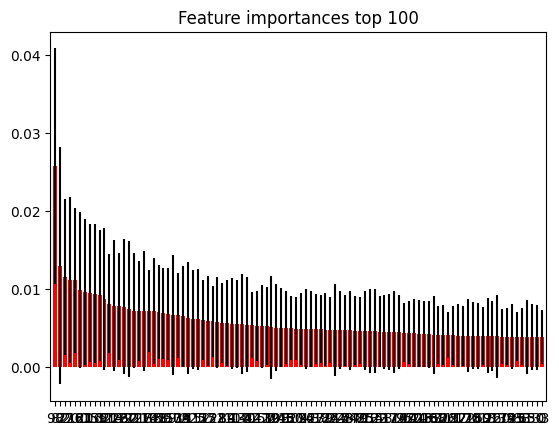

In [ ]:
model_for_IDs = rf_importance(X_train=train_X_std, y_train=train_speaker_IDs, max_depth=10,top_n=100)
model_for_ages = rf_importance(X_train=train_X_std, y_train=train_speaker_ages, max_depth=10,top_n=100)
model_for_genders = rf_importance(X_train=train_X_std, y_train=train_speaker_genders, max_depth=10,top_n=100)
model_for_accents = rf_importance(X_train=train_X_std, y_train=train_speaker_accents, max_depth=10,top_n=100)

In [ ]:
from sklearn.feature_selection import SelectFromModel

# only 5 features have importance > 0.05
feature_selection_for_IDs = SelectFromModel(model_for_IDs, threshold=0.0013,prefit=True)  #0.0015 => 244
#0.0013 => 250 Accuracy INCREASED: 0.99228611500701

feature_selection_for_ages = SelectFromModel(model_for_ages, threshold=0.0013,prefit=True)
# 0.0013 => 0.9737026647966339 | 255 | dec

feature_selection_for_genders = SelectFromModel(model_for_genders, threshold=0.0013,prefit=True)
feature_selection_for_accents = SelectFromModel(model_for_accents, threshold=0.0013,prefit=True)

selected_train_feat_for_IDs = train_X_std[train_X_std.columns[(feature_selection_for_IDs.get_support())]]
selected_train_feat_for_ages = train_X_std[train_X_std.columns[(feature_selection_for_ages.get_support())]]
selected_train_feat_for_genders = train_X_std[train_X_std.columns[(feature_selection_for_genders.get_support())]]
selected_train_feat_for_accents = train_X_std[train_X_std.columns[(feature_selection_for_accents.get_support())]]

# Print the resulting DataFrame (reduced version of training dataFrame)
print("Reduced version of training dataFrame:")
print(selected_train_feat_for_IDs.shape)
print(selected_train_feat_for_ages.shape)
print(selected_train_feat_for_genders.shape)
print(selected_train_feat_for_accents.shape)

selected_valid_feat_for_IDs = valid_X_std[valid_X_std.columns[(feature_selection_for_IDs.get_support())]]
selected_valid_feat_for_ages = valid_X_std[valid_X_std.columns[(feature_selection_for_ages.get_support())]]
selected_valid_feat_for_genders = valid_X_std[valid_X_std.columns[(feature_selection_for_genders.get_support())]]
selected_valid_feat_for_accents = valid_X_std[valid_X_std.columns[(feature_selection_for_accents.get_support())]]

# Print the resulting DataFrame (reduced version of validation dataFrame)
print("Reduced version of validation dataFrame:")
print(selected_valid_feat_for_IDs.shape)
print(selected_valid_feat_for_ages.shape)
print(selected_valid_feat_for_genders.shape)
print(selected_valid_feat_for_accents.shape)

Reduced version of training dataFrame:
(28520, 250)
(28520, 255)
(28520, 65)
(28520, 253)
Reduced version of validation dataFrame:
(750, 250)
(750, 255)
(750, 65)
(750, 253)


In [ ]:
run_models_and_check_with_test_dataset(selected_train_feat_for_IDs, train_speaker_IDs, selected_valid_feat_for_IDs, valid_speaker_IDs)
run_models_and_check_with_test_dataset(selected_train_feat_for_ages, train_speaker_ages, selected_valid_feat_for_ages, valid_speaker_ages)
run_models_and_check_with_test_dataset(selected_train_feat_for_genders, train_speaker_genders, selected_valid_feat_for_genders, valid_speaker_genders)
run_models_and_check_with_test_dataset(selected_train_feat_for_accents, train_speaker_accents, selected_valid_feat_for_accents, valid_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9933333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9853333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9946666666666667 ( SVM )


In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(selected_train_feat_for_IDs, train_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(selected_train_feat_for_ages, train_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(selected_train_feat_for_genders, train_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(selected_train_feat_for_accents, train_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9935133239831697 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9849228611500701 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9987727910238429 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.989656381486676 ( SVM )


## PCA

In [36]:
from sklearn.decomposition import PCA
import numpy as np

# Create a PCA model with the desired explained variance threshold
pca = PCA(n_components=0.96)

# Fit the PCA model on the training data
pca.fit(train_X_std)

# Transform the training and validation data using the PCA model
reduced_train_X_pca = pca.transform(train_X_std)
reduced_validation_X_pca = pca.transform(valid_X_std)

# Print the shapes of the reduced datasets
print("Reduced Training Data Shape:", reduced_train_X_pca.shape)
print("Reduced Validation Data Shape:", reduced_validation_X_pca.shape)

Reduced Training Data Shape: (28520, 73)
Reduced Validation Data Shape: (750, 73)


In [ ]:
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_IDs, reduced_validation_X_pca, valid_speaker_IDs)
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_ages, reduced_validation_X_pca, valid_speaker_ages)
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_genders, reduced_validation_X_pca, valid_speaker_genders)
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_accents, reduced_validation_X_pca, valid_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9933333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9826666666666667 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9893333333333333 ( SVM )


In [ ]:
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_accents)

Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9924614305750351 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9798387096774194 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9996493688639552 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.986851332398317 ( SVM )


# Conclusion

Based on above results of all the techniques, these are the optimal ways to reduce the features based on each class label.

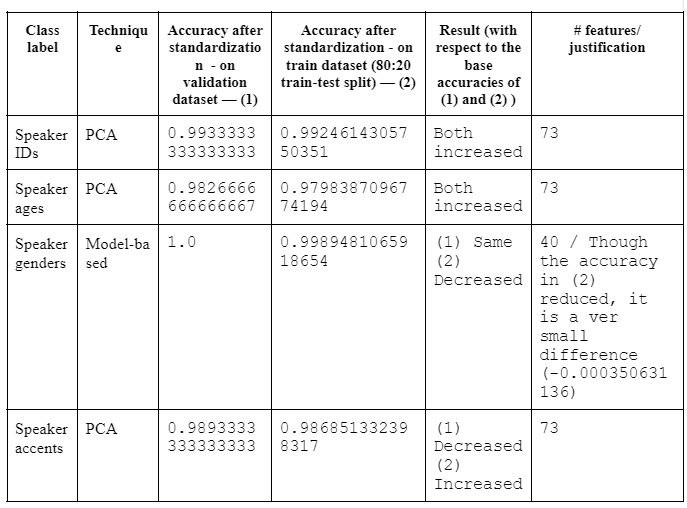

In [ ]:
print("CONCLUSION")
print("Features reduced (to 73) based on 'PCA' will be used for : SPEAKER_ID class labels")
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_IDs, reduced_validation_X_pca, valid_speaker_IDs)
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_IDs)
print()

print("Features reduced (to 73) based on 'PCA' will be used for : SPEAKER_AGE class labels ")
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_ages, reduced_validation_X_pca, valid_speaker_ages)
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_ages)
print()

print('Features reduced (to 40) based on "Model-based feature selection" will be used for : SPEAKER_GENDER class labels')
run_models_and_check_with_test_dataset(selected_X_for_genders, train_speaker_genders, reduced_validation_for_genders, valid_speaker_genders)
run_models_and_check_with_train_test_split_on_train_dataset(selected_X_for_genders, train_speaker_genders)
print()

print('Features reduced (to 73) based on "PCA" will be used for : SPEAKER_ACCENT class labels ')
run_models_and_check_with_test_dataset(reduced_train_X_pca, train_speaker_accents, reduced_validation_X_pca, valid_speaker_accents)
run_models_and_check_with_train_test_split_on_train_dataset(reduced_train_X_pca, train_speaker_accents)
print()

CONCLUSION
Features reduced (to 73) based on 'PCA' will be used for : SPEAKER_ID class labels
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9933333333333333 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9924614305750351 ( SVM )

Features reduced (to 73) based on 'PCA' will be used for : SPEAKER_AGE class labels 
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9826666666666667 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9798387096774194 ( SVM )

Features reduced (to 40) based on "Model-based feature selection" will be used for : SPEAKER_GENDER class labels
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 1.0 ( SVM )
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0.9989481065918654 ( SVM )

Features reduced (to 73) based on "PCA" will be used for : SPEAKER_ACCENT class labels 
Best accuracy out of SVM, NB, Logigstic Reg, and Random Forest is: 0

# Predicting for Test data

## Importing

In [37]:
test_data_file_path = "/content/drive/MyDrive/SEM 7 - ML/Lab 1 - Feature Engineering/test.csv"
# importing test  dataset

test_df = pd.read_csv(test_data_file_path)
print(test_df.shape)
test_df.head()

(750, 260)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575,NaN,NaN,NaN,NaN
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136,NaN,NaN,NaN,NaN
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104,NaN,NaN,NaN,NaN
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013,NaN,NaN,NaN,NaN
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939,NaN,NaN,NaN,NaN


In [38]:
test_df = test_df.drop(columns=['label_1','label_2','label_3','label_4'])
test_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
0,-1.141206,-0.279703,1.019681,2.605902,0.460391,-1.167380,-1.149165,-1.205164,2.468966,-2.729526,...,1.670388,-0.355608,-0.342747,-0.102831,-0.868282,-0.429783,0.438561,-1.625122,0.599944,-0.615575
1,-1.796767,-0.056758,0.771219,4.414086,-1.229059,1.732098,0.063241,-0.126311,1.322355,-3.461282,...,1.136570,0.826741,-0.371280,-1.492272,0.227806,0.209200,2.200402,-1.701029,1.163999,-1.570136
2,-1.388968,-0.418296,0.186543,2.803852,-1.499095,1.395180,0.739648,0.274060,1.228789,-3.081147,...,0.343188,-0.243809,0.462302,-1.511495,-0.692679,0.449235,1.377531,-1.854203,-0.040538,-2.164104
3,1.276844,-0.112323,-0.310796,2.251175,0.283670,-0.581020,-0.024439,-0.306097,2.424685,-1.714863,...,3.057573,-0.632902,1.511204,-0.658826,-0.690499,-1.077949,0.930102,-2.758352,-0.246738,-1.389013
4,-1.560815,-0.168494,1.249770,1.869219,-1.646049,0.132156,-0.664602,0.483327,1.728020,-2.258071,...,1.217447,-0.374313,1.280207,-1.546299,-0.510597,1.213396,2.497490,-1.597984,-0.163483,-1.735939


## Check for null values

In [39]:
# Check for null/NaN values in all columns
print(test_df.isna().any())
print(test_df.isna().any().sum().sum())
# No null values  based on the below output

feature_1      False
feature_2      False
feature_3      False
feature_4      False
feature_5      False
               ...  
feature_252    False
feature_253    False
feature_254    False
feature_255    False
feature_256    False
Length: 256, dtype: bool
0


In [40]:
test_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,-0.248243,-0.585421,-0.261300,0.292129,0.106505,-0.327901,-0.186109,0.746488,0.896069,-1.999506,...,-0.154492,-0.602800,0.672062,-1.119721,0.064154,0.279551,1.792623,-1.468001,0.617542,-1.543454
std,1.007230,1.031605,1.088193,1.275657,0.820163,1.055800,0.937663,1.038833,0.912043,0.865403,...,1.048629,1.057025,0.946949,1.224694,0.978063,1.150581,0.962225,1.002188,0.999210,1.202299
min,-3.338338,-5.240058,-3.552587,-3.875104,-2.599635,-3.934916,-2.964872,-2.428432,-2.603179,-4.547704,...,-3.376492,-3.953429,-2.261036,-6.458198,-3.547722,-3.188699,-1.288992,-4.936862,-2.188391,-5.697614
25%,-0.889425,-1.284925,-1.045593,-0.595757,-0.447941,-1.082658,-0.789457,0.097839,0.294905,-2.604528,...,-0.849998,-1.336208,0.052016,-1.914514,-0.563641,-0.552616,1.203707,-2.110703,-0.072770,-2.341033
50%,-0.219966,-0.558214,-0.228610,0.242556,0.114963,-0.293032,-0.200180,0.743686,0.903759,-2.022947,...,-0.209235,-0.554957,0.778283,-1.097376,0.036205,0.250225,1.887835,-1.454391,0.549354,-1.593112
75%,0.432476,0.144174,0.433977,1.086600,0.621324,0.401023,0.429726,1.483986,1.515494,-1.431881,...,0.528018,0.133290,1.344037,-0.248962,0.742721,1.074692,2.446600,-0.809374,1.284066,-0.785415
max,2.788072,2.412955,3.071344,4.845111,3.024339,2.596057,3.295141,4.404866,3.434419,0.694695,...,3.859370,3.362586,4.066997,2.738063,3.257086,3.445455,4.506212,1.633000,4.192348,2.523189


## Standardizing features

In [41]:
from sklearn.preprocessing import StandardScaler

test_X_std = pd.DataFrame()
new_columns = []

test_X_std = ss.transform(test_df)
test_X_std = pd.DataFrame(test_X_std)

test_X_std.describe()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,-0.022980,0.030828,-0.045025,-0.035392,0.001249,0.010933,0.016585,0.004003,-0.049185,-0.047806,...,-0.002735,-0.002968,0.068031,0.038971,0.093232,-0.014309,0.070394,0.008486,-0.067978,0.015765
std,1.016773,1.025905,1.011850,1.021427,0.986819,0.983743,0.993825,0.984021,0.969802,0.986862,...,1.016037,1.004722,1.005722,1.029887,0.988462,0.980589,0.993425,0.970367,0.971701,0.966684
min,-3.142353,-4.598093,-3.105410,-3.372123,-3.254776,-3.349909,-2.928616,-3.003398,-3.770039,-2.953643,...,-3.124592,-3.187802,-3.047113,-4.450336,-3.557046,-2.970143,-3.111139,-3.350232,-2.796663,-3.324300
25%,-0.670237,-0.664811,-0.774296,-0.746328,-0.665860,-0.692313,-0.622902,-0.610421,-0.688421,-0.737742,...,-0.676625,-0.700086,-0.590499,-0.629398,-0.541237,-0.723528,-0.537616,-0.613809,-0.739286,-0.625511
50%,0.005564,0.057885,-0.014629,-0.075085,0.011425,0.043421,0.001671,0.001349,-0.041008,-0.074537,...,-0.055777,0.042507,0.180844,0.057761,0.064987,-0.039302,0.168693,0.021664,-0.134289,-0.024161
75%,0.664189,0.756393,0.601474,0.600746,0.620679,0.690108,0.669305,0.702588,0.609467,0.599486,...,0.658561,0.696699,0.781712,0.771221,0.779014,0.663354,0.745576,0.646200,0.580196,0.625251
max,3.042103,3.012640,3.053814,3.610210,3.511984,2.735334,3.706349,3.469354,2.649918,3.024525,...,3.886370,3.766203,3.673674,3.283112,3.320112,2.683849,2.871969,3.011024,3.408412,3.285464


In [42]:
test_X_std.shape

(750, 256)

## Model-based feature selection (for SPEAKER_GENDER class label)

In [48]:
train_select_for_genders = SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))
train_fitted_for_genders = train_select_for_genders.fit(train_X_std, train_speaker_genders)


reduced_test_data_for_genders = train_fitted_for_genders.transform(test_X_std)
reduced_test_data_for_genders = pd.DataFrame(reduced_test_data_for_genders)

In [49]:
print(reduced_test_data_for_genders.shape)

(750, 40)


In [50]:
reduced_test_data_for_genders.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-1.002549,0.229390,0.847002,-0.274949,-1.068496,0.748090,-0.524462,-0.278963,1.301616,-1.799432,...,-2.185672,0.107854,0.164324,-1.279730,-1.071803,0.604337,-1.095685,-0.099313,1.237449,-0.085091
1,-0.043748,-1.151648,1.833312,0.175430,-0.347027,-1.612636,0.008919,-0.854998,2.465626,0.855490,...,0.130791,1.715009,1.880468,0.414868,-1.613145,-1.676498,1.968035,0.137892,1.902516,0.463435
2,0.883285,-0.167011,1.937213,0.032814,-0.919939,-0.691886,-0.152155,-0.835757,0.650064,0.514020,...,-0.687831,0.878326,0.991815,-0.317195,-1.744744,-0.418783,-0.167267,0.137073,2.214855,-0.707941
3,2.227648,-0.638288,1.991901,1.049984,-0.824045,-0.156417,0.775980,-0.028805,-0.247351,1.389636,...,-0.603552,-0.105935,-1.705200,0.396371,0.253688,-0.688320,-0.539230,0.719069,-0.065173,-0.908464
4,-0.031044,-0.286469,0.716870,1.528838,-0.275270,-0.275456,0.336181,0.452605,0.821805,-0.300763,...,-0.067501,0.457764,0.159960,-0.622601,0.204040,-0.571485,0.348210,0.389733,-0.441833,-0.827501


### The Prediction

For all the previous model results, SVM gave the best accuracies. Therefore for the prediction of test data also the SVM is used. Also I used: "class_weight='balanced" to tackle the class imbalance issues

In [51]:
import warnings

# For all the previous model results SVM
def predict_using_svm(train_features, train_class_labels, test_features):

  warnings.filterwarnings("ignore")

  svm_model = SVC(class_weight='balanced')
  svm_model.fit(train_features, train_class_labels)

  # Predict on the test set
  svm_predictions = svm_model.predict(test_features)
  return svm_predictions

In [52]:
# NOTE: from the "Model-based feature selection" section in this notebook, the reduced feature set for speaker_gender class labels
# were saved under the variable name: "selected_X_for_genders"
print(selected_X_for_genders.shape)
predicted_speaker_gender_labels_after_feature_eng = predict_using_svm(selected_X_for_genders, train_speaker_genders, reduced_test_data_for_genders)

(28520, 40)


In [53]:
len(predicted_speaker_gender_labels_after_feature_eng)

750

In [54]:
reduced_test_X_model_based_df = pd.DataFrame(reduced_test_data_for_genders)
reduced_test_X_model_based_df.shape

(750, 40)

In [55]:
if "Predicted labels after feature engineering" not in reduced_test_X_model_based_df.columns:
    lab_1_label_1_df = reduced_test_X_model_based_df.insert(0, "Predicted labels after feature engineering", predicted_speaker_gender_labels_after_feature_eng)
else:
    print(f"Column : Predicted labels after feature engineering already exists.")

In [56]:
print(reduced_test_X_model_based_df.shape)
reduced_test_X_model_based_df.head()

(750, 41)


,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,8,...,30,31,32,33,34,35,36,37,38,39
0,1,-1.002549,0.229390,0.847002,-0.274949,-1.068496,0.748090,-0.524462,-0.278963,1.301616,...,-2.185672,0.107854,0.164324,-1.279730,-1.071803,0.604337,-1.095685,-0.099313,1.237449,-0.085091
1,1,-0.043748,-1.151648,1.833312,0.175430,-0.347027,-1.612636,0.008919,-0.854998,2.465626,...,0.130791,1.715009,1.880468,0.414868,-1.613145,-1.676498,1.968035,0.137892,1.902516,0.463435
2,1,0.883285,-0.167011,1.937213,0.032814,-0.919939,-0.691886,-0.152155,-0.835757,0.650064,...,-0.687831,0.878326,0.991815,-0.317195,-1.744744,-0.418783,-0.167267,0.137073,2.214855,-0.707941
3,1,2.227648,-0.638288,1.991901,1.049984,-0.824045,-0.156417,0.775980,-0.028805,-0.247351,...,-0.603552,-0.105935,-1.705200,0.396371,0.253688,-0.688320,-0.539230,0.719069,-0.065173,-0.908464
4,1,-0.031044,-0.286469,0.716870,1.528838,-0.275270,-0.275456,0.336181,0.452605,0.821805,...,-0.067501,0.457764,0.159960,-0.622601,0.204040,-0.571485,0.348210,0.389733,-0.441833,-0.827501


In [57]:
print(train_X_std.shape)
print(test_df.shape)

(28520, 256)
(750, 256)


In [58]:
predicted_speaker_gender_labels_before_feature_engineering = predict_using_svm(train_X, train_speaker_genders, test_df)

In [59]:
len(predicted_speaker_gender_labels_before_feature_engineering)

750

In [60]:
if "Predicted labels before feature engineering" not in reduced_test_X_model_based_df.columns:
    lab_1_label_1_df = reduced_test_X_model_based_df.insert(0, "Predicted labels before feature engineering", predicted_speaker_gender_labels_before_feature_engineering)
else:
    print(f"Column : Predicted labels before feature engineering already exists.")

In [61]:
print(reduced_test_X_model_based_df.shape)
reduced_test_X_model_based_df.head()

(750, 42)


,Predicted labels before feature engineering,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,...,30,31,32,33,34,35,36,37,38,39
0,1,1,-1.002549,0.229390,0.847002,-0.274949,-1.068496,0.748090,-0.524462,-0.278963,...,-2.185672,0.107854,0.164324,-1.279730,-1.071803,0.604337,-1.095685,-0.099313,1.237449,-0.085091
1,1,1,-0.043748,-1.151648,1.833312,0.175430,-0.347027,-1.612636,0.008919,-0.854998,...,0.130791,1.715009,1.880468,0.414868,-1.613145,-1.676498,1.968035,0.137892,1.902516,0.463435
2,1,1,0.883285,-0.167011,1.937213,0.032814,-0.919939,-0.691886,-0.152155,-0.835757,...,-0.687831,0.878326,0.991815,-0.317195,-1.744744,-0.418783,-0.167267,0.137073,2.214855,-0.707941
3,1,1,2.227648,-0.638288,1.991901,1.049984,-0.824045,-0.156417,0.775980,-0.028805,...,-0.603552,-0.105935,-1.705200,0.396371,0.253688,-0.688320,-0.539230,0.719069,-0.065173,-0.908464
4,1,1,-0.031044,-0.286469,0.716870,1.528838,-0.275270,-0.275456,0.336181,0.452605,...,-0.067501,0.457764,0.159960,-0.622601,0.204040,-0.571485,0.348210,0.389733,-0.441833,-0.827501


In [62]:
reduced_test_X_model_based_df.shape

(750, 42)

In [63]:
no_of_new_features = reduced_test_X_model_based_df.shape[1] - 2
no_of_new_features

40

In [64]:
if "No of new features" not in reduced_test_X_model_based_df.columns:
    lab_1_label_1_df = reduced_test_X_model_based_df.insert(2, "No of new features", no_of_new_features)
else:
    print(f"Column : No of new features already exists.")

In [70]:
print(reduced_test_X_model_based_df.shape)
reduced_test_X_model_based_df.head()

(750, 43)


,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,1,1,40,-1.002549,0.229390,0.847002,-0.274949,-1.068496,0.748090,-0.524462,...,-2.185672,0.107854,0.164324,-1.279730,-1.071803,0.604337,-1.095685,-0.099313,1.237449,-0.085091
1,1,1,40,-0.043748,-1.151648,1.833312,0.175430,-0.347027,-1.612636,0.008919,...,0.130791,1.715009,1.880468,0.414868,-1.613145,-1.676498,1.968035,0.137892,1.902516,0.463435
2,1,1,40,0.883285,-0.167011,1.937213,0.032814,-0.919939,-0.691886,-0.152155,...,-0.687831,0.878326,0.991815,-0.317195,-1.744744,-0.418783,-0.167267,0.137073,2.214855,-0.707941
3,1,1,40,2.227648,-0.638288,1.991901,1.049984,-0.824045,-0.156417,0.775980,...,-0.603552,-0.105935,-1.705200,0.396371,0.253688,-0.688320,-0.539230,0.719069,-0.065173,-0.908464
4,1,1,40,-0.031044,-0.286469,0.716870,1.528838,-0.275270,-0.275456,0.336181,...,-0.067501,0.457764,0.159960,-0.622601,0.204040,-0.571485,0.348210,0.389733,-0.441833,-0.827501


In [88]:
temp_df = reduced_test_X_model_based_df.copy(deep=True)

In [89]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,30,31,32,33,34,35,36,37,38,39
0,1,1,40,-1.002549,0.229390,0.847002,-0.274949,-1.068496,0.748090,-0.524462,...,-2.185672,0.107854,0.164324,-1.279730,-1.071803,0.604337,-1.095685,-0.099313,1.237449,-0.085091
1,1,1,40,-0.043748,-1.151648,1.833312,0.175430,-0.347027,-1.612636,0.008919,...,0.130791,1.715009,1.880468,0.414868,-1.613145,-1.676498,1.968035,0.137892,1.902516,0.463435
2,1,1,40,0.883285,-0.167011,1.937213,0.032814,-0.919939,-0.691886,-0.152155,...,-0.687831,0.878326,0.991815,-0.317195,-1.744744,-0.418783,-0.167267,0.137073,2.214855,-0.707941
3,1,1,40,2.227648,-0.638288,1.991901,1.049984,-0.824045,-0.156417,0.775980,...,-0.603552,-0.105935,-1.705200,0.396371,0.253688,-0.688320,-0.539230,0.719069,-0.065173,-0.908464
4,1,1,40,-0.031044,-0.286469,0.716870,1.528838,-0.275270,-0.275456,0.336181,...,-0.067501,0.457764,0.159960,-0.622601,0.204040,-0.571485,0.348210,0.389733,-0.441833,-0.827501


In [90]:
no_of_new_features

40

In [91]:
# Define the new column names
new_column_names = ['Predicted labels before feature engineering',
                    'Predicted labels after feature engineering',
                    'No of new features'] + [f'new_feature_{i+1}' for i in range(no_of_new_features)]

# Rename the columns
temp_df.columns = new_column_names

In [94]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_31,new_feature_32,new_feature_33,new_feature_34,new_feature_35,new_feature_36,new_feature_37,new_feature_38,new_feature_39,new_feature_40
0,1,1,40,-1.002549,0.229390,0.847002,-0.274949,-1.068496,0.748090,-0.524462,...,-2.185672,0.107854,0.164324,-1.279730,-1.071803,0.604337,-1.095685,-0.099313,1.237449,-0.085091
1,1,1,40,-0.043748,-1.151648,1.833312,0.175430,-0.347027,-1.612636,0.008919,...,0.130791,1.715009,1.880468,0.414868,-1.613145,-1.676498,1.968035,0.137892,1.902516,0.463435
2,1,1,40,0.883285,-0.167011,1.937213,0.032814,-0.919939,-0.691886,-0.152155,...,-0.687831,0.878326,0.991815,-0.317195,-1.744744,-0.418783,-0.167267,0.137073,2.214855,-0.707941
3,1,1,40,2.227648,-0.638288,1.991901,1.049984,-0.824045,-0.156417,0.775980,...,-0.603552,-0.105935,-1.705200,0.396371,0.253688,-0.688320,-0.539230,0.719069,-0.065173,-0.908464
4,1,1,40,-0.031044,-0.286469,0.716870,1.528838,-0.275270,-0.275456,0.336181,...,-0.067501,0.457764,0.159960,-0.622601,0.204040,-0.571485,0.348210,0.389733,-0.441833,-0.827501


In [95]:
temp_df.to_csv('190290U_label_3.csv', index=False)

## PCA (for other 3 class labels)

In [96]:
reduced_test_X_pca = pca.transform(test_X_std)

print("Reduced Test Data Shape:", reduced_test_X_pca.shape)

Reduced Test Data Shape: (750, 73)


### The Prediction

For all the previous model results, SVM gave the best accuracies. Therefore for the prediction of test data also the SVM is used

#### speaker IDs

In [97]:
predicted_speaker_ID_labels_after_feature_eng = predict_using_svm(reduced_train_X_pca, train_speaker_IDs, reduced_test_X_pca)

In [98]:
len(predicted_speaker_ID_labels_after_feature_eng)

750

In [99]:
reduced_test_X_pca_df = pd.DataFrame(reduced_test_X_pca)
reduced_test_X_pca_df.shape

(750, 73)

In [100]:
if "Predicted labels after feature engineering" not in reduced_test_X_pca_df.columns:
    lab_1_label_1_df = reduced_test_X_pca_df.insert(0, "Predicted labels after feature engineering", predicted_speaker_ID_labels_after_feature_eng)
else:
    print(f"Column : Predicted labels after feature engineering already exists.")

In [101]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 74)


,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,72
0,45,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,2.685400,5.946839,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,45,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,2.366489,-2.672080,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,45,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,-0.250999,-5.807706,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,45,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,0.404839,1.420231,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,45,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,3.521929,0.719271,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [102]:
predicted_speaker_ID_labels_before_feature_engineering = predict_using_svm(train_X, train_speaker_IDs, test_df)

In [103]:
len(predicted_speaker_ID_labels_before_feature_engineering)

750

In [104]:
if "Predicted labels before feature engineering" not in reduced_test_X_pca_df.columns:
    reduced_test_X_pca_df.insert(0, "Predicted labels before feature engineering", predicted_speaker_ID_labels_before_feature_engineering)
else:
    print(f"Column : Predicted labels before feature engineering already exists.")

In [105]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 75)


,Predicted labels before feature engineering,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,...,63,64,65,66,67,68,69,70,71,72
0,45,45,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,2.685400,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,45,45,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,2.366489,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,45,45,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,-0.250999,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,45,45,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,0.404839,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,45,45,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,3.521929,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [106]:
no_of_new_features = reduced_test_X_pca_df.shape[1] - 2
no_of_new_features

73

In [107]:
if "No of new features" not in reduced_test_X_pca_df.columns:
    lab_1_label_1_df = reduced_test_X_pca_df.insert(2, "No of new features", no_of_new_features)
else:
    print(f"Column : No of new features already exists.")

In [108]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 76)


,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,72
0,45,45,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,45,45,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,45,45,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,45,45,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,45,45,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [109]:
temp_df = reduced_test_X_pca_df.copy(deep=True)

In [110]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,72
0,45,45,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,45,45,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,45,45,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,45,45,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,45,45,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [111]:
no_of_new_features

73

In [112]:
# Define the new column names
new_column_names = ['Predicted labels before feature engineering',
                    'Predicted labels after feature engineering',
                    'No of new features'] + [f'new_feature_{i+1}' for i in range(no_of_new_features)]

# Rename the columns
temp_df.columns = new_column_names

In [113]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_64,new_feature_65,new_feature_66,new_feature_67,new_feature_68,new_feature_69,new_feature_70,new_feature_71,new_feature_72,new_feature_73
0,45,45,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,45,45,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,45,45,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,45,45,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,45,45,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [114]:
temp_df.to_csv('190290U_label_1.csv', index=False)

#### speaker ages

In [115]:
predicted_speaker_age_labels_after_feature_eng = predict_using_svm(reduced_train_X_pca, train_speaker_ages, reduced_test_X_pca)

In [116]:
len(predicted_speaker_age_labels_after_feature_eng)

750

In [117]:
reduced_test_X_pca_df = pd.DataFrame(reduced_test_X_pca)
reduced_test_X_pca_df.shape

(750, 73)

In [118]:
if "Predicted labels after feature engineering" not in reduced_test_X_pca_df.columns:
    reduced_test_X_pca_df.insert(0, "Predicted labels after feature engineering", predicted_speaker_age_labels_after_feature_eng)
else:
    print(f"Column : Predicted labels after feature engineering already exists.")

In [119]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 74)


,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,72
0,28.0,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,2.685400,5.946839,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,28.0,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,2.366489,-2.672080,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,28.0,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,-0.250999,-5.807706,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,28.0,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,0.404839,1.420231,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,28.0,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,3.521929,0.719271,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [120]:
predicted_speaker_age_labels_before_feature_engineering = predict_using_svm(train_X, train_speaker_ages, test_df)

In [121]:
len(predicted_speaker_age_labels_before_feature_engineering)

750

In [122]:
if "Predicted labels before feature engineering" not in reduced_test_X_pca_df.columns:
    reduced_test_X_pca_df.insert(0, "Predicted labels before feature engineering", predicted_speaker_age_labels_before_feature_engineering)
else:
    print(f"Column : Predicted labels before feature engineering already exists.")

In [123]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 75)


,Predicted labels before feature engineering,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,...,63,64,65,66,67,68,69,70,71,72
0,28.0,28.0,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,2.685400,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,28.0,28.0,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,2.366489,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,28.0,28.0,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,-0.250999,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,28.0,28.0,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,0.404839,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,28.0,28.0,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,3.521929,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [124]:
no_of_new_features = reduced_test_X_pca_df.shape[1] - 2
no_of_new_features

73

In [125]:
if "No of new features" not in reduced_test_X_pca_df.columns:
    lab_1_label_1_df = reduced_test_X_pca_df.insert(2, "No of new features", no_of_new_features)
else:
    print(f"Column : No of new features already exists.")

In [126]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 76)


,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,72
0,28.0,28.0,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,28.0,28.0,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,28.0,28.0,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,28.0,28.0,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,28.0,28.0,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [127]:
temp_df = reduced_test_X_pca_df.copy(deep=True)

In [128]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,72
0,28.0,28.0,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,28.0,28.0,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,28.0,28.0,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,28.0,28.0,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,28.0,28.0,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [129]:
no_of_new_features

73

In [130]:
# Define the new column names
new_column_names = ['Predicted labels before feature engineering',
                    'Predicted labels after feature engineering',
                    'No of new features'] + [f'new_feature_{i+1}' for i in range(no_of_new_features)]

# Rename the columns
temp_df.columns = new_column_names

In [131]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_64,new_feature_65,new_feature_66,new_feature_67,new_feature_68,new_feature_69,new_feature_70,new_feature_71,new_feature_72,new_feature_73
0,28.0,28.0,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,28.0,28.0,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,28.0,28.0,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,28.0,28.0,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,28.0,28.0,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [132]:
temp_df.to_csv('190290U_label_2.csv', index=False)

#### speaker accents

In [133]:
predicted_speaker_accent_labels_after_feature_eng = predict_using_svm(reduced_train_X_pca, train_speaker_accents, reduced_test_X_pca)

In [134]:
len(predicted_speaker_accent_labels_after_feature_eng)

750

In [135]:
reduced_test_X_pca_df = pd.DataFrame(reduced_test_X_pca)
reduced_test_X_pca_df.shape

(750, 73)

In [136]:
if "Predicted labels after feature engineering" not in reduced_test_X_pca_df.columns:
    reduced_test_X_pca_df.insert(0, "Predicted labels after feature engineering", predicted_speaker_accent_labels_after_feature_eng)
else:
    print(f"Column : Predicted labels after feature engineering already exists.")

In [137]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 74)


,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,8,...,63,64,65,66,67,68,69,70,71,72
0,6,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,2.685400,5.946839,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,6,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,2.366489,-2.672080,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,6,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,-0.250999,-5.807706,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,6,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,0.404839,1.420231,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,6,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,3.521929,0.719271,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [138]:
predicted_speaker_accent_labels_before_feature_engineering = predict_using_svm(train_X, train_speaker_accents, test_df)

In [139]:
len(predicted_speaker_accent_labels_before_feature_engineering)

750

In [140]:
if "Predicted labels before feature engineering" not in reduced_test_X_pca_df.columns:
    reduced_test_X_pca_df.insert(0, "Predicted labels before feature engineering", predicted_speaker_accent_labels_before_feature_engineering)
else:
    print(f"Column : Predicted labels before feature engineering already exists.")

In [141]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 75)


,Predicted labels before feature engineering,Predicted labels after feature engineering,0,1,2,3,4,5,6,7,...,63,64,65,66,67,68,69,70,71,72
0,6,6,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,2.685400,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,6,6,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,2.366489,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,6,6,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,-0.250999,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,6,6,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,0.404839,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,6,6,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,3.521929,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [142]:
no_of_new_features = reduced_test_X_pca_df.shape[1] - 2
no_of_new_features

73

In [143]:
if "No of new features" not in reduced_test_X_pca_df.columns:
    lab_1_label_1_df = reduced_test_X_pca_df.insert(2, "No of new features", no_of_new_features)
else:
    print(f"Column : No of new features already exists.")

In [144]:
print(reduced_test_X_pca_df.shape)
reduced_test_X_pca_df.head()

(750, 76)


,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,72
0,6,6,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,6,6,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,6,6,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,6,6,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,6,6,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [145]:
temp_df = reduced_test_X_pca_df.copy(deep=True)

In [146]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,0,1,2,3,4,5,6,...,63,64,65,66,67,68,69,70,71,72
0,6,6,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,6,6,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,6,6,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,6,6,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,6,6,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [147]:
no_of_new_features

73

In [148]:
# Define the new column names
new_column_names = ['Predicted labels before feature engineering',
                    'Predicted labels after feature engineering',
                    'No of new features'] + [f'new_feature_{i+1}' for i in range(no_of_new_features)]

# Rename the columns
temp_df.columns = new_column_names

In [149]:
temp_df.head()

,Predicted labels before feature engineering,Predicted labels after feature engineering,No of new features,new_feature_1,new_feature_2,new_feature_3,new_feature_4,new_feature_5,new_feature_6,new_feature_7,...,new_feature_64,new_feature_65,new_feature_66,new_feature_67,new_feature_68,new_feature_69,new_feature_70,new_feature_71,new_feature_72,new_feature_73
0,6,6,73,-1.967567,6.945703,-3.947321,-1.108198,-6.440248,-1.053785,3.471608,...,-0.092956,-0.961733,-1.577341,0.453901,0.417493,-0.059037,0.410030,0.346114,-0.400974,-0.909111
1,6,6,73,-6.692310,8.884467,-0.489867,-10.240206,-4.576115,2.229018,-2.025519,...,1.326354,0.892220,-0.054520,-0.060989,0.535704,-0.394302,-0.273221,-0.101095,-0.799512,0.141794
2,6,6,73,-4.810155,3.547653,-0.297522,-5.550987,-2.225314,-1.305231,-0.434514,...,0.770387,0.258546,-0.176509,-0.049412,0.955720,0.006397,0.744428,0.277256,-0.440561,0.471287
3,6,6,73,-2.185614,5.993099,-1.089448,-0.938549,2.566186,4.411621,0.475160,...,-1.203948,0.575542,1.194812,-0.065328,0.985061,0.120340,0.978793,0.339959,-0.154516,-0.381609
4,6,6,73,0.695696,6.181181,1.442544,-3.112025,-2.881196,-1.171098,1.626019,...,0.289207,1.111349,0.781681,0.461655,0.158719,-0.004349,0.953420,-0.244694,0.507702,0.237962


In [150]:
temp_df.to_csv('190290U_label_4.csv', index=False)